In [1]:
# import neccessary packages and libraries
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Data Overview

The well known questions and answers website Stack Overflow has been conducted annual surveys for a decade now.  These are the largest and the most comprehensive surveys of coders ever conducted. The anonymized results of the surveys are publicly available for analysis at [Stack Overflow Anual Developer Survey](https://insights.stackoverflow.com/survey).

The 2020 Stack Overflow Survey was conducted in February 2020, just before the COVID-19 pandemic affected the entire world. There are 60 questions distributed over six sections:

1. Basic Information
2. Education, Work, Career
3. Technology and Tech Culture
4. Stack Overflow Usage + Community
5. Demographic Information
6. Survey Opinion and Final Questions

The survey had 64461 (almost 65k) responses from 184 countries and regions.

## Upload Data

In [4]:
# create a path string
mypath = os.getcwd()

#upload datafiles as pandas dataframes

#df17 = pd.read_csv(path+'/data/survey17_results_public.csv', low_memory=False)
#df18 = pd.read_csv(path+'/data/survey18_results_public.csv', low_memory=False)
#df19 = pd.read_csv(path+'/data/survey19_results_public.csv', low_memory=False)
df = pd.read_csv(mypath+'/data/survey20_results_public.csv', low_memory=False)

#df17s = pd.read_csv(path+'/data/survey17_results_schema.csv', low_memory=False)
#df18s = pd.read_csv(path+'/data/survey18_results_schema.csv', low_memory=False)
#df19s = pd.read_csv(path+'/data/survey19_results_schema.csv', low_memory=False)
dfs = pd.read_csv(mypath+'/data/survey20_results_schema.csv', low_memory=False)

## General Data Information

In [5]:
# get the shape of the data
df.shape

(64461, 61)

In [8]:
# the column names
dfs['Column'].unique()

array(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode',
       'CompFreq', 'CompTotal', 'ConvertedComp', 'Country',
       'CurrencyDesc', 'CurrencySymbol', 'DatabaseDesireNextYear',
       'DatabaseWorkedWith', 'DevType', 'EdLevel', 'Employment',
       'Ethnicity', 'Gender', 'JobFactors', 'JobSat', 'JobSeek',
       'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith',
       'NEWDevOps', 'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt',
       'NEWJobHuntResearch', 'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood',
       'NEWOtherComms', 'NEWOvertime', 'NEWPurchaseResearch',
       'NEWPurpleLink', 'NEWSOSites', 'NEWStuck', 'OpSys', 'OrgSize',
       'PlatformDesireNextYear', 'PlatformWorkedWith', 'PurchaseWhat',
       'Sexuality', 'SOAccount', 'SOComm', 'SOPartFreq', 'SOVisitFreq',
       'SurveyEase', 'SurveyLength', 'Trans', 'UndergradMajor',
       'WebframeDesir

In [16]:
# look at the rows of the dataframe
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [17]:
# look at the endrows of the dataframe
df.tail()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN
64460,65112,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Spain,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",ASP.NET Core;jQuery,Angular;Angular.js;ASP.NET Core;jQuery,NaN,NaN,NaN,NaN


In [45]:
# get the number of NaN values in each column
df_null = df.isnull().sum()
df_null

Respondent                0
MainBranch              299
Hobbyist                 45
Age                   19015
Age1stCode             6561
                      ...  
WebframeWorkedWith    22182
WelcomeChange         11778
WorkWeekHrs           23310
YearsCode              6777
YearsCodePro          18112
Length: 61, dtype: int64

In [22]:
# the columns with no missing data
no_null = set(df.columns[np.sum(df.isnull()) == 0]) 
no_null

{'Respondent'}

In [49]:
# columns with more than 75% values missing
most_missing_cols = df.columns[df.isnull().mean() > 0.75]
most_missing_cols

Index([], dtype='object')

In [44]:
# most missing values, in descending order
df.isnull().mean().sort_values(ascending=False)

ConvertedComp             0.460821
CompTotal                 0.459735
NEWPurchaseResearch       0.421030
PurchaseWhat              0.389336
WebframeDesireNextYear    0.379097
                            ...   
Employment                0.009417
Country                   0.006035
MainBranch                0.004638
Hobbyist                  0.000698
Respondent                0.000000
Length: 61, dtype: float64

In [50]:
# columns with more than 75% values missing
most_missing_vals = df.columns[df.isnull().mean() > 0.30]
most_missing_vals

Index(['CompFreq', 'CompTotal', 'ConvertedComp', 'DatabaseDesireNextYear',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWJobHunt', 'NEWJobHuntResearch', 'NEWOnboardGood',
       'NEWOvertime', 'NEWPurchaseResearch', 'OrgSize', 'PurchaseWhat',
       'Sexuality', 'WebframeDesireNextYear', 'WebframeWorkedWith',
       'WorkWeekHrs'],
      dtype='object')

In [51]:
# general data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

In [52]:
# look at the numeraical data
df.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


## Specific Information from Data

In [66]:
# the number of countries involved
len(df.Country.unique())

184

In [70]:
# distribution of respondends on countries
country_counts = df.Country.value_counts()
country_counts

United States     12469
India              8403
United Kingdom     3896
Germany            3890
Canada             2191
                  ...  
Kiribati              1
Lesotho               1
Liechtenstein         1
Fiji                  1
Mali                  1
Name: Country, Length: 183, dtype: int64

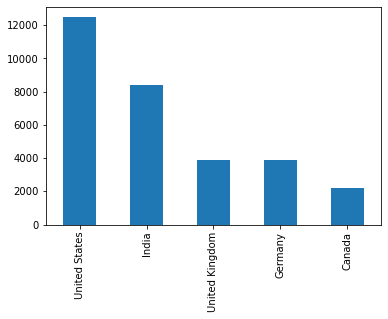

In [94]:
# countries with more than 1000 respondents
most_represented_countries = country_counts[country_counts > 2000]
most_represented_countries.plot(kind='bar');

In [76]:
# countries with less than 100 respondents
least_represented_countries = country_counts[country_counts < 100]
len(least_represented_countries)

114

In [80]:
# distribution by gender 
df['Gender'].value_counts()

Man                                                            46013
Woman                                                           3844
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         76
Woman;Man;Non-binary, genderqueer, or gender non-conforming       26
Name: Gender, dtype: int64

In [95]:
# distribution by gender and country with most respondents
df_most_repres_countries = df[df['Country'].map(df['Country'].value_counts()) > 2000]
df_most_repres_countries.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
5,6,I am a developer by profession,No,NaN,14,NaN,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,React.js,NaN,NaN,NaN,6,4
6,7,I am a developer by profession,Yes,NaN,18,Monthly,NaN,NaN,India,United States dollar,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,A lot more welcome now than last year,NaN,6,4


In [96]:
# percentage of most represented countries respondents
df_most_repres_countries.shape[0]/df.shape[0]

0.4785684367291851

In [99]:
# take a look at the questions
dfs.head(20)

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...
5,CompFreq,"Is that compensation weekly, monthly, or yearly?"
6,CompTotal,What is your current total compensation (salar...
7,ConvertedComp,Salary converted to annual USD salaries using ...
8,Country,Where do you live?
9,CurrencyDesc,Which currency do you use day-to-day? If your ...


In [103]:
list(dfs[dfs.Column == 'DevType']['QuestionText'])

['Which of the following describe you? Please select all that apply.']

In [106]:
# respondents choose more than one answer
developers = df['DevType'].value_counts().reset_index()
developers.head(10)

,index,DevType
0,"Developer, full-stack",4424
1,"Developer, back-end",3086
2,"Developer, back-end;Developer, front-end;Devel...",2227
3,"Developer, back-end;Developer, full-stack",1476
4,"Developer, front-end",1401
5,"Developer, mobile",1251
6,"Developer, front-end;Developer, full-stack",830
7,"Developer, back-end;Developer, desktop or ente...",813
8,"Developer, back-end;Developer, desktop or ente...",650
9,"Developer, desktop or enterprise applications",606


In [107]:
# rename the columns in the results dataframe
developers.rename(columns = {'index':'devChoice', 'DevType':'count'}, inplace=True)
developers.head(12)

,devChoice,count
0,"Developer, full-stack",4424
1,"Developer, back-end",3086
2,"Developer, back-end;Developer, front-end;Devel...",2227
3,"Developer, back-end;Developer, full-stack",1476
4,"Developer, front-end",1401
5,"Developer, mobile",1251
6,"Developer, front-end;Developer, full-stack",830
7,"Developer, back-end;Developer, desktop or ente...",813
8,"Developer, back-end;Developer, desktop or ente...",650
9,"Developer, desktop or enterprise applications",606


In [108]:
# create a list of the individual answers that are marked by a user
# this is also available in the documentation
pd_series = developers['devChoice']
dev_choices = pd_series.str.split(';', expand=True)[0].unique()
dev_choices

array(['Developer, full-stack', 'Developer, back-end',
       'Developer, front-end', 'Developer, mobile',
       'Developer, desktop or enterprise applications',
       'Developer, embedded applications or devices',
       'Data scientist or machine learning specialist',
       'Developer, QA or test', 'Data or business analyst', 'Designer',
       'Academic researcher', 'Engineering manager', 'Engineer, data',
       'DevOps specialist', 'System administrator',
       'Database administrator', 'Developer, game or graphics',
       'Senior executive/VP', 'Scientist', 'Product manager', 'Educator',
       'Engineer, site reliability', 'Marketing or sales professional'],
      dtype=object)

In [110]:
# import neccessary package
from collections import defaultdict

# use defaultdict to work with missing values
new_res = defaultdict(int)

# function to count all unique strings
def count_strings(pos_vals, dframe, col1, col2):
    new_doc = defaultdict(int)
    for entry in pos_vals:
        for idx in range(dframe.shape[0]):
            if entry in dframe[col1][idx]:
                new_res[entry] += dframe[col2][idx]
    # create a dataframe from the dictionary
    new_df = pd.DataFrame.from_dict(new_res, orient = 'index').reset_index()
    # rename columns
    new_df.columns = [col1, col2]
    return new_df


In [112]:
dev_counts = count_strings(dev_choices, developers, 'devChoice', 'count')
len(dev_counts)

23

In [131]:
# look at these results as percentages
dev_counts['perc'] = dev_counts['count']/np.sum(dev_counts['count'])
dev_counts.sort_values(by='count', ascending=False).round(2)

,devChoice,count,perc
1,"Developer, back-end",54456,0.17
0,"Developer, full-stack",54250,0.17
2,"Developer, front-end",36592,0.12
4,"Developer, desktop or enterprise applications",23568,0.08
3,"Developer, mobile",18964,0.06
13,DevOps specialist,11938,0.04
15,Database administrator,11444,0.04
9,Designer,10642,0.03
14,System administrator,10484,0.03
5,"Developer, embedded applications or devices",9500,0.03


In [132]:
data_people = ['Data scientist or machine learning specialist', 'Data or business analyst', 'Engineer, data']
data_people

['Data scientist or machine learning specialist',
 'Data or business analyst',
 'Engineer, data']

In [142]:
df1 = df.dropna(subset=['DevType'], axis=0)
df1.shape

(49370, 61)

In [145]:
#Series.str.contains(pat, case=True, flags=0, na=nan, regex=True)
contain_datas = df1[df1['DevType'].str.contains('Data', case=False)]
contain_datas.shape

(12228, 61)

In [148]:
len(contain_datas['DevType'].value_counts())

5180

In [126]:
df_temp = df['DevType'].dropna(axis=0).reset_index(drop=True)


AttributeError: 'function' object has no attribute 'shape'

In [124]:
df_temp[df_temp['DevType'].str.contains("Data scientist or machine learning specialist")]

KeyError: 'DevType'

In [48]:
df20.info().isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

AttributeError: 'NoneType' object has no attribute 'isnull'

In [65]:
df20['DevType'].isnull().sum()

15091

In [68]:
desc = list(df20s[df20s.Column == 'DevType']['QuestionText'])[0]
desc

'Which of the following describe you? Please select all that apply.'

In [70]:
print(list(df20['DevType'].unique()))

['Developer, desktop or enterprise applications;Developer, full-stack', 'Developer, full-stack;Developer, mobile', nan, 'Designer;Developer, front-end;Developer, mobile', 'Developer, back-end;Developer, front-end;Developer, QA or test;DevOps specialist', 'Developer, back-end;Developer, desktop or enterprise applications;Developer, game or graphics', 'Developer, full-stack', 'Database administrator;Developer, full-stack;Developer, mobile', 'Developer, back-end;Developer, desktop or enterprise applications;Developer, embedded applications or devices;Developer, front-end', 'Designer;Developer, front-end', 'Designer;Developer, back-end', 'Developer, desktop or enterprise applications;Developer, front-end', 'Database administrator;Developer, back-end;Developer, desktop or enterprise applications;Developer, full-stack;Developer, QA or test;DevOps specialist', 'Developer, back-end', 'Developer, desktop or enterprise applications', 'Developer, full-stack;Engineer, data', 'Developer, back-end;D

In [73]:
datas = df20['DevType'].value_counts()
datas

Developer, full-stack                                                                                                                                                                                                                       4424
Developer, back-end                                                                                                                                                                                                                         3086
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                                                                              2227
Developer, back-end;Developer, full-stack                                                                                                                                                                                                   1476
Developer, front-end                

In [74]:
# create a list of the individual answers that are marked by a user
# this is also available in the documentation
pd_series = df20['DevType']
pos_values = pd_series.str.split(';', expand=True)[0].unique()
pos_values

array(['Developer, desktop or enterprise applications',
       'Developer, full-stack', nan, 'Designer', 'Developer, back-end',
       'Database administrator', 'Data or business analyst',
       'Academic researcher', 'Developer, front-end',
       'Data scientist or machine learning specialist',
       'Developer, mobile', 'DevOps specialist', 'Developer, QA or test',
       'System administrator',
       'Developer, embedded applications or devices',
       'Engineering manager', 'Senior executive/VP',
       'Developer, game or graphics', 'Engineer, data',
       'Marketing or sales professional', 'Scientist', 'Educator',
       'Product manager', 'Engineer, site reliability'], dtype=object)

In [63]:
df19s.head(40)

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open sour...
5,Employment,Which of the following best describes your cur...
6,Country,In which country do you currently reside?
7,Student,"Are you currently enrolled in a formal, degree..."
8,EdLevel,Which of the following best describes the high...
9,UndergradMajor,What was your main or most important field of ...
